<a href="https://colab.research.google.com/github/kalnikos/Document-Classification-/blob/main/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import pickle
from zipfile import ZipFile
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV


In [2]:
files = "/content/model_data.zip"

with ZipFile(files, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
## Read the different data parts
path_df = "/content/model_data/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

path_X_train = "/content/model_data/X_train.pickle"
with open(path_X_train, 'rb') as data:
    X_train = pickle.load(data)

path_X_test = "/content/model_data/X_test.pickle"
with open(path_X_test, 'rb') as data:
    X_test = pickle.load(data)

path_y_train = "/content/model_data/y_train.pickle"
with open(path_y_train, 'rb') as data:
    y_train = pickle.load(data)

path_y_test = "/content/model_data/y_test.pickle"
with open(path_y_test, 'rb') as data:
    y_test = pickle.load(data)

In [5]:
print(X_train.shape)
print(X_test.shape)

(1080, 293)
(121, 293)


In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 42)

print('Parameters currently in use:\n')
print(clf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [17]:
## Random search cross validation
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(1, 5, num = 5)]


# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [19]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator=clf,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=42)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  7.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [20]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 4, 'bootstrap': True}

The mean accuracy of a model with these hyperparameters is:
0.8231481481481482


In [21]:
rand_rf = random_search.best_estimator_
rand_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [22]:
## Fit the model
rand_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [23]:
## Predictions
y_pred = rand_rf.predict(X_train)

## Accuracy
print("Train set Accuracy:", accuracy_score(y_train, y_pred))

Train set Accuracy: 0.8981481481481481


In [25]:
## cross validation scores 
scores = cross_val_score(rand_rf, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.82407407, 0.81481481, 0.77777778, 0.80555556, 0.7962963 ,
       0.86111111, 0.81481481, 0.80555556, 0.84259259, 0.81481481])

In [31]:
# Create the parameter grid based on the results of random search 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

bootstrap = [True]
max_depth = [1,2,3]
max_features = ['auto']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [1000]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=42)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .20, random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  5.4min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_sampl...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [32]:
## Best parameters
best_rf = grid_search.best_estimator_
best_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [33]:
## Fit the model
best_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
## Predictions
y_pred = best_rf.predict(X_train)

## Train set Accuracy
print("Train set Accuracy:", accuracy_score(y_train, y_pred))

Train set Accuracy: 0.8768518518518519


In [35]:
## Validation score
scores = cross_val_score(best_rf, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.80555556, 0.82407407, 0.76851852, 0.80555556, 0.77777778,
       0.86111111, 0.81481481, 0.78703704, 0.84259259, 0.78703704])

In [37]:
## Test set Accuracy

y_test_pred = best_rf.predict(X_test)

## Test set Accuracy
print("Test set Accuracy:", accuracy_score(y_test, y_test_pred))

Test set Accuracy: 0.8347107438016529


In [38]:
# Classification report
print("Classification report")
print(classification_report(y_test,y_test_pred))

Classification report
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.67      0.80      0.73        10
           2       1.00      0.71      0.83        14
           3       0.80      0.86      0.83        14
           4       0.92      0.80      0.86        15
           5       0.92      0.73      0.81        15
           6       1.00      0.96      0.98        23
           7       0.70      1.00      0.82        14

    accuracy                           0.83       121
   macro avg       0.84      0.83      0.82       121
weighted avg       0.86      0.83      0.84       121



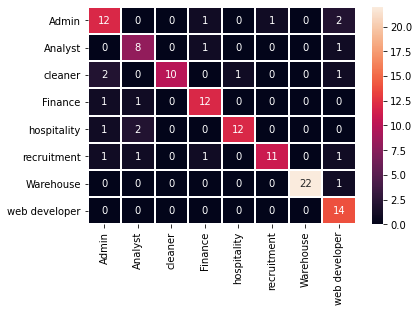

In [39]:
## Confusion matrix
encode = {'Admin':0, 'Analyst':1, 'cleaner':2, 'Finance':3, 'hospitality':4,
       'recruitment':5, 'Warehouse':6, 'web developer':7}
labels = [i for i in encode]
cf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [42]:
## Create a data freme with the model train, test set accuracy
D = {
     'Model': 'Random Forest',
     'Train Set Accuracy': accuracy_score(y_train,best_rf.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, y_test_pred)
}

rf_df = pd.DataFrame(D, index=[0])
rf_df

,Model,Train Set Accuracy,Test Set Accuracy
0,Random Forest,0.876852,0.834711


In [43]:
## Save the model and the dataframe
## Save the model
with open('/content/model_data/best_rm.pickle', 'wb') as output:
    pickle.dump(best_rf, output)

## Save the data frame
with open('/content/model_data/rm_df.pickle', 'wb') as output:
  pickle.dump(rm_df, output)